try to understand for each round (different day) the mean color and other variables

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


split images to 4 different groups ( August, september, november, December) then calculate mean value for each channel ( red , green, blue)
also displays histogram

In [2]:
import os
import numpy as np
import re
import cv2

# Path to your folder containing images
folder_path = '/content/mydrive/Othercomputers/My PC/Thesis/roboflowV6_1169/original/bounded'

# Group definitions
groups = {
    "25August23": range(3148, 3479),
    "29September23": range(4299, 4570),
    "3November23": range(4803, 5106),
    "16December23": range(5366, 5638),
}

# Function to get the image number from the filename
def get_image_number(filename):
    match = re.search(r'A(\d+)_', filename)
    return int(match.group(1)) if match else None

# List files and their extracted numbers
print("Listing files and their extracted numbers:")
for filename in os.listdir(folder_path):
    if filename.endswith('.JPG'):
        image_number = get_image_number(filename)
        # print(f"{filename}: {image_number}")

# Function to process a group of images in batches
def process_group(group_name, image_numbers, batch_size=50):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)
                   if filename.endswith('.JPG') and get_image_number(filename) in image_numbers]

    all_mean_values_r = []
    all_mean_values_g = []
    all_mean_values_b = []

    for i in range(0, len(image_paths), batch_size):
        batch_image_paths = image_paths[i:i+batch_size]

        batch_mean_values_r = []
        batch_mean_values_g = []
        batch_mean_values_b = []

        for image_path in batch_image_paths:
            image = cv2.imread(image_path)  # Read the image in color
            b, g, r = cv2.split(image)  # Split into color channels
            mean_pixel_value_r = np.mean(r)
            mean_pixel_value_g = np.mean(g)
            mean_pixel_value_b = np.mean(b)
            batch_mean_values_r.append(mean_pixel_value_r)
            batch_mean_values_g.append(mean_pixel_value_g)
            batch_mean_values_b.append(mean_pixel_value_b)

        all_mean_values_r.extend(batch_mean_values_r)
        all_mean_values_g.extend(batch_mean_values_g)
        all_mean_values_b.extend(batch_mean_values_b)

    overall_mean_pixel_value_r = np.mean(all_mean_values_r)
    overall_mean_pixel_value_g = np.mean(all_mean_values_g)
    overall_mean_pixel_value_b = np.mean(all_mean_values_b)

    print(f'Mean pixel value for {group_name} - Red channel: {overall_mean_pixel_value_r}')
    print(f'Mean pixel value for {group_name} - Green channel: {overall_mean_pixel_value_g}')
    print(f'Mean pixel value for {group_name} - Blue channel: {overall_mean_pixel_value_b}')

    return {
        'R': overall_mean_pixel_value_r,
        'G': overall_mean_pixel_value_g,
        'B': overall_mean_pixel_value_b
    }

# Process each group and calculate the mean pixel values for the entire group
group_means = {}
for group_name, image_numbers in groups.items():
    mean_values = process_group(group_name, image_numbers)
    group_means[group_name] = mean_values

# Display results
print("Group Mean Pixel Values:")
for group_name, mean_values in group_means.items():
    print(f"{group_name}: {mean_values}")


Listing files and their extracted numbers:
Mean pixel value for 25August23 - Red channel: 109.36369136880309
Mean pixel value for 25August23 - Green channel: 123.81148170276815
Mean pixel value for 25August23 - Blue channel: 101.28115977640485
Mean pixel value for 29September23 - Red channel: 106.1413633380914
Mean pixel value for 29September23 - Green channel: 119.22270169332083
Mean pixel value for 29September23 - Blue channel: 98.5687667321303
Mean pixel value for 3November23 - Red channel: 107.37773212370648
Mean pixel value for 3November23 - Green channel: 121.13309532840498
Mean pixel value for 3November23 - Blue channel: 96.69949656654671
Mean pixel value for 16December23 - Red channel: 125.0941634474845
Mean pixel value for 16December23 - Green channel: 116.01215744647997
Mean pixel value for 16December23 - Blue channel: 73.71064769002326
Group Mean Pixel Values:
25August23: {'R': 109.36369136880309, 'G': 123.81148170276815, 'B': 101.28115977640485}
29September23: {'R': 106.141

Mean pixel value for Red channel: 104.12109439673013
Mean pixel value for Green channel: 125.23129333091887
Mean pixel value for Blue channel: 100.6847636848096


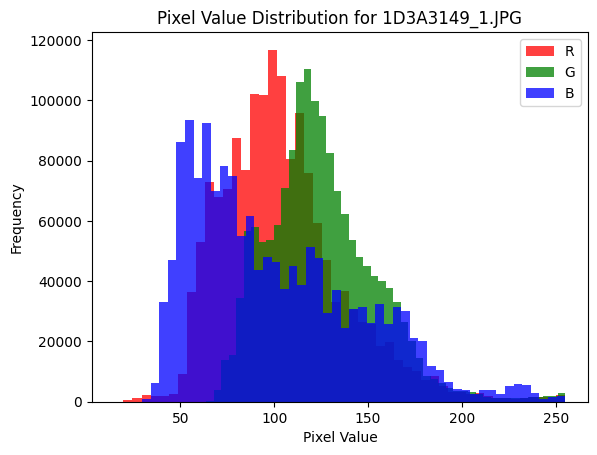

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to your image file
image_path = '/content/mydrive/Othercomputers/My PC/Thesis/roboflowV6_1169/original/bounded/1D3A3149_1.JPG'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Split the image into its color channels
b, g, r = cv2.split(image)

# Calculate the mean pixel value for each color channel
mean_r = np.mean(r)
mean_g = np.mean(g)
mean_b = np.mean(b)

# Print the mean values
print(f'Mean pixel value for Red channel: {mean_r}')
print(f'Mean pixel value for Green channel: {mean_g}')
print(f'Mean pixel value for Blue channel: {mean_b}')

# Plot histogram for each color channel
plt.hist(r.flatten(), bins=50, alpha=0.75, color='red', label='R')
plt.hist(g.flatten(), bins=50, alpha=0.75, color='green', label='G')
plt.hist(b.flatten(), bins=50, alpha=0.75, color='blue', label='B')

plt.title('Pixel Value Distribution for 1D3A3149_1.JPG')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
